## Visualize Ground-Truth Shape Hierarchy of Graphs and Edge Relationships

<IPython.core.display.Javascript object>


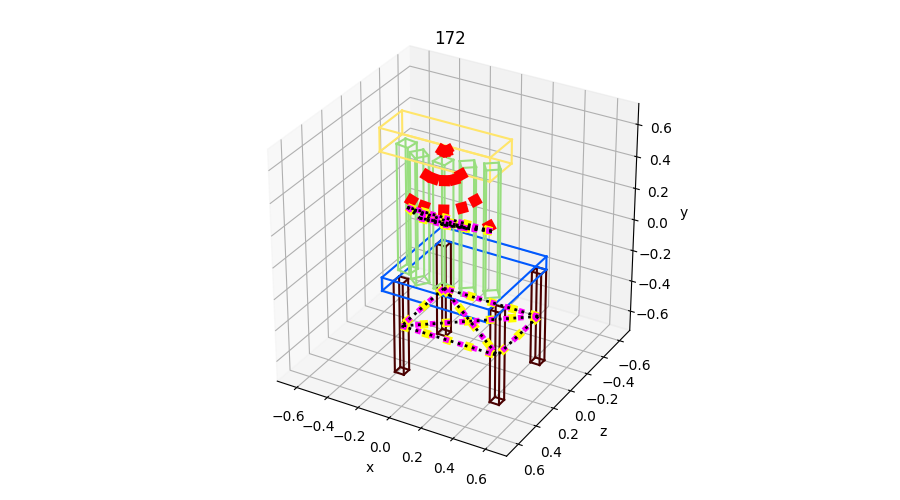

PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_surface_vertical_bar [LEAF] {3}
  |  |  ├1 back_surface_vertical_bar [LEAF] {4}
  |  |  ├2 back_surface_vertical_bar [LEAF] {5}
  |  |  ├3 back_surface_vertical_bar [LEAF] {6}
  |  |  ├4 back_surface_horizontal_bar [LEAF] {7}
  |  |  ├5 back_surface_vertical_bar [LEAF] {8}
  ├1 chair_seat    {9}
  |  ├0 seat_surface    {10}
  |  |  ├0 seat_single_surface [LEAF] {11}
  ├2 chair_base    {12}
  |  ├0 regular_leg_base    {13}
  |  |  ├0 leg [LEAF] {14}
  |  |  ├1 leg [LEAF] {15}
  |  |  ├2 leg [LEAF] {16}
  |  |  ├3 leg [LEAF] {17}



In [2]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# ground-truth data directory
root_dir = '../data/partnetdata/chair_hier'

# read all data
obj_list = sorted([int(item.split('.')[0]) for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 0
obj = PartNetDataset.load_object(os.path.join(root_dir, str(obj_list[obj_id])+'.json'))

# edge visu: ADJ (red), ROT_SYM (yellow), TRANS_SYM (purple), REF_SYM (black)
draw_partnet_objects(objects=[obj], object_names=[str(obj_list[obj_id])], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)')
print(obj)

## Box-shape AE Reconstruction

../data/results/box_ae_chair/746
box pc chamfer distance: 0.04700719192624092
structure distance: 0.11764705882352941
edge precision: 0.9459459459459459
edge recall: 0.603448275862069
pred binary diff: 0.020304746787390998
gt binary diff: 0.022586666400833375


<IPython.core.display.Javascript object>


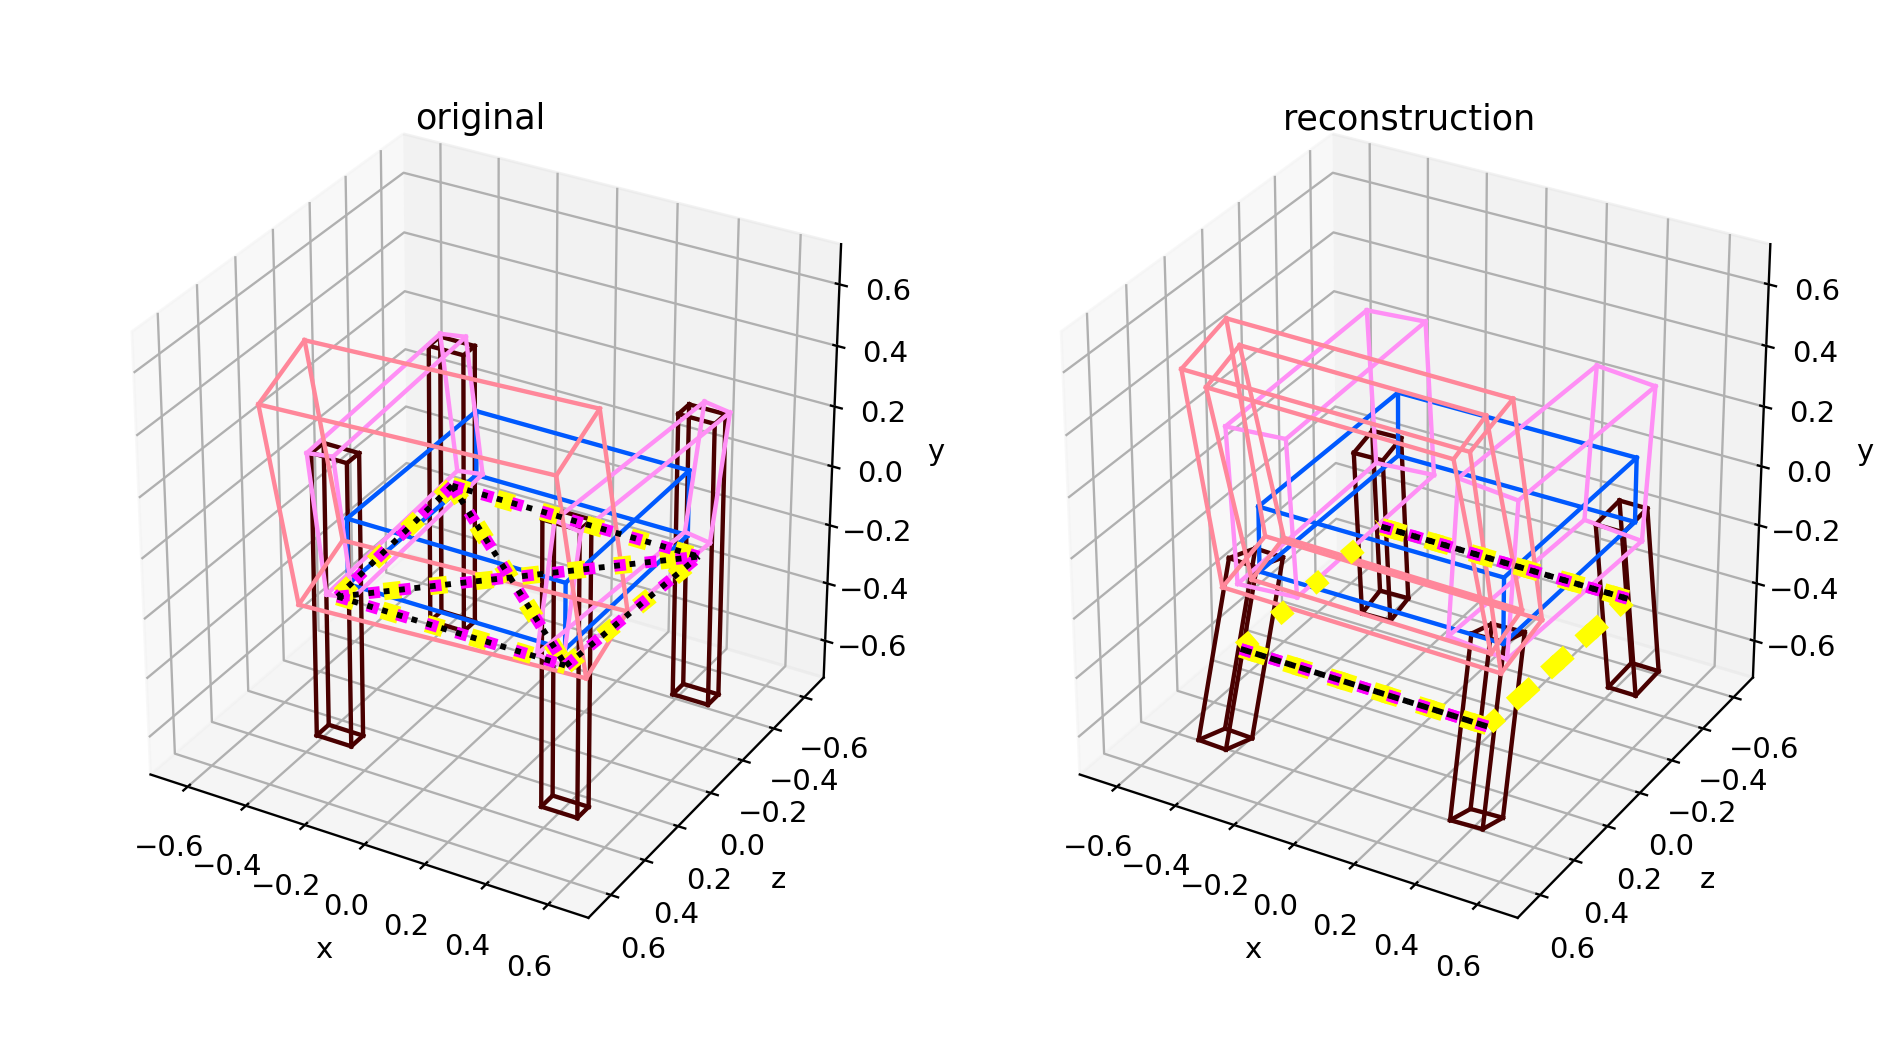

Original Structure:
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_single_surface [LEAF] {3}
  ├1 chair_arm    {4}
  |  ├0 arm_sofa_style [LEAF] {5}
  ├2 chair_arm    {6}
  |  ├0 arm_sofa_style [LEAF] {7}
  ├3 chair_seat    {8}
  |  ├0 seat_surface    {9}
  |  |  ├0 seat_single_surface [LEAF] {10}
  ├4 chair_base    {11}
  |  ├0 regular_leg_base    {12}
  |  |  ├0 leg [LEAF] {13}
  |  |  ├1 leg [LEAF] {14}
  |  |  ├2 leg [LEAF] {15}
  |  |  ├3 leg [LEAF] {16}

Reconstructed Structure:
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {0}
  |  |  ├0 back_single_surface [LEAF] {0}
  |  ├1 back_surface    {2}
  |  |  ├0 back_single_surface [LEAF] {3}
  ├1 chair_arm    {6}
  |  ├0 arm_sofa_style [LEAF] {7}
  ├2 chair_arm    {4}
  |  ├0 arm_sofa_style [LEAF] {5}
  ├3 chair_seat    {8}
  |  ├0 seat_surface    {9}
  |  |  ├0 seat_single_surface [LEAF] {10}
  ├4 chair_base    {11}
  |  ├0 regular_leg_base    {12}
  |  |  ├0 leg [LEAF] {15}
  |  | 

In [2]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/box_ae_chair'

# read all data
obj_list = sorted([int(item) for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))])

# visualize one data
obj_id = 2
obj_dir = os.path.join(root_dir, str(obj_list[obj_id]))
print(obj_dir)

orig_obj = PartNetDataset.load_object(os.path.join(obj_dir, 'orig.json'))
recon_obj = PartNetDataset.load_object(os.path.join(obj_dir, 'recon.json'))
    
stat_filename = os.path.join(obj_dir, 'stats.txt')
with open(stat_filename, 'r') as stat_file:
    stats = stat_file.readlines()
stats = [x.strip() for x in stats]
stats = list(filter(None, stats))
for stat in stats:
    print(stat)

draw_partnet_objects(objects=[orig_obj, recon_obj], object_names=['original', 'reconstruction'], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('Original Structure:')
print(orig_obj)
print('Reconstructed Structure:')
print(recon_obj)

## Box-shape VAE Free Generation

<IPython.core.display.Javascript object>


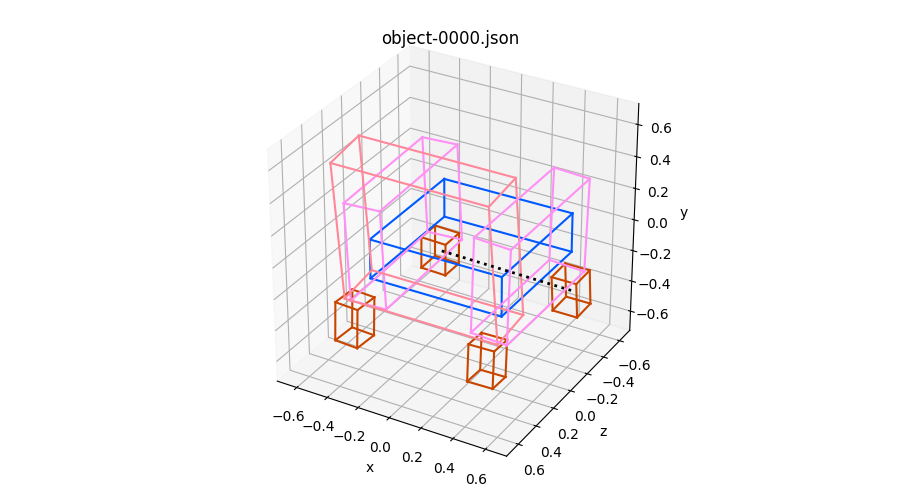

Tree Structure:
0 chair    {0}
  ├0 chair_arm    {0}
  |  ├0 arm_sofa_style [LEAF] {0}
  ├1 chair_back    {0}
  |  ├0 back_surface    {0}
  |  |  ├0 back_single_surface [LEAF] {0}
  ├2 chair_arm    {0}
  |  ├0 arm_sofa_style [LEAF] {0}
  ├3 chair_seat    {0}
  |  ├0 seat_surface    {0}
  |  |  ├0 seat_single_surface [LEAF] {0}
  ├4 chair_base    {0}
  |  ├0 foot_base    {0}
  |  |  ├0 foot [LEAF] {0}
  |  |  ├1 foot [LEAF] {0}
  |  |  ├2 foot [LEAF] {0}
  |  |  ├3 foot [LEAF] {0}



In [4]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/box_vae_chair'

# read all data
obj_list = sorted([item for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 0
obj = PartNetDataset.load_object(os.path.join(root_dir, obj_list[obj_id]))

draw_partnet_objects(objects=[obj], object_names=[obj_list[obj_id]], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, 
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('Tree Structure:')
print(obj)